In [0]:
import os
import time
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.svm import LinearSVC


In [0]:
from skimage import io

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/data"
 

README	s11  s14  s17  s2   s22  s25  s28  s30	s33  s36  s39  s5  s8
s1	s12  s15  s18  s20  s23  s26  s29  s31	s34  s37  s4   s6  s9
s10	s13  s16  s19  s21  s24  s27  s3   s32	s35  s38  s40  s7


In [0]:
x = []
y = []
path = 'content/drive/My Drive/data'
path_new = []
path_data = []
images = []
dir = os.listdir('/content/drive/My Drive/data')
for sub_dir in dir:
  if(sub_dir=='README'):
    continue
  path_new.append(sub_dir)

for loc in path_new:
  loc='/'+path + '/'+loc
  path_data.append(loc)

for paths in path_data:
  for image in os.listdir(paths):
    images.append(image)
#for path1 in path_data:


In [6]:

import numpy as np

X = []
y = []

for sub_dir in os.listdir('/content/drive/My Drive/data'):
    if not os.path.isdir(os.path.join('/content/drive/My Drive/data', sub_dir)):
        continue
        
    label = int(sub_dir[1:])
    for file in os.listdir(os.path.join('/content/drive/My Drive/data', sub_dir)):
        filename = os.path.join('/content/drive/My Drive/data', sub_dir, file)
        image = cv2.imread(filename,0)

        X.append(image)
        y.append(label)
        
X = np.array(X, dtype='float64')
y = np.array(y)
print(np.unique(y))
print("X.shape: {}, y.shape: {}".format(X.shape, y.shape))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
X.shape: (400, 112, 92), y.shape: (400,)


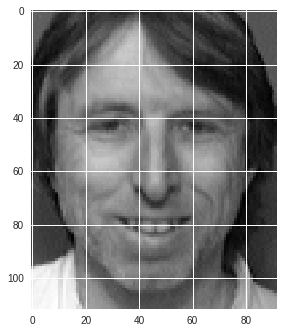

In [7]:
pltimage = plt.imshow(X[1], cmap='gray')
plt.show()


In [8]:
total_images = X.shape[0]
X_dimension = X.shape[1]
Y_dimension = X.shape[2]
X=X.reshape(total_images,(X_dimension*Y_dimension))
print(X.shape)

(400, 10304)


In [9]:
num = 5
x_sample = X[y<=num]
y_sample = y[y<=num]
#print(x_sample, y_sample)
scaler = StandardScaler()
#print(scaler.fit(x_sample))
#print(scaler.mean_)
x_scaler = scaler.fit_transform(x_sample)
print(x_scaler.shape)

(50, 10304)


In [0]:
def PCA_model(X):
  pca = PCA(n_components=2)
  pca.fit(X)
  return pca

  

In [11]:
pca_model = PCA_model(x_scaler)
x_pca = pca_model.fit_transform(x_scaler)
print(x_pca.shape)
print(pca_model.explained_variance_ratio_)

(50, 2)
[0.19366511 0.15008569]


In [12]:
pca_first= pca_model.components_[0]
pca_second = pca_model.components_[1]
print(pca_first[0], pca_first[1], pca_first[2])
print(pca_second[0], pca_second[1], pca_second[2])
#print(pca_first, pca_second)

-0.01985073236794129 -0.019763917860712688 -0.01993936829191424
0.007952031780773973 0.008155045321382065 0.007317617767641529


1.066390953147123 1.0617272357892678
-0.11123081851878087 -0.11407051570747041
0.43577629329398127 0.43387048430603065
0.25065740950800575 0.2570566354651887
0.9727857180184631 0.9685313705624878
-0.12211952546386523 -0.1252372088340122
0.7650017787828256 0.7616561464291653
-0.02190134033635066 -0.022460476512905603
0.5719651135916058 0.5694637011213738
0.22645208477994075 0.23223335436948267
0.6352083715883369 0.6324303732382113
0.16805258444411741 0.17234292823510008
0.4076846910809389 0.40590173693573084
0.2846067450697162 0.29187268974781005
0.8619774982434397 0.8582077556281495
-0.0682834701374466 -0.07002673140950613
0.330266438066242 0.32882206223448823
0.1359028964437983 0.13937246610178888
0.8659483048293065 0.8621611964256584
-0.018855243279755098 -0.0193366132997423
0.6940788647060557 0.6910434041749088
-0.07273507670131728 -0.07459198646408213
0.8806859805707051 0.8768344189250571
-0.24431007431651733 -0.2505472542675757
0.7676577274855123 0.7643004796975408
-0.138560856753

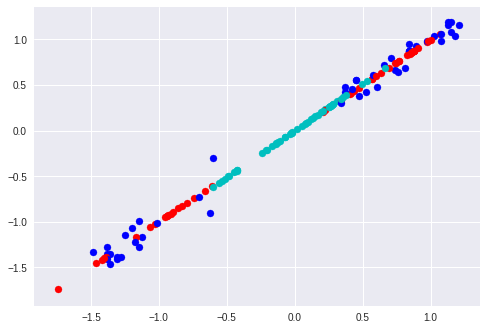

'\nNOT ORTHOGONAL\n'

In [13]:
for i, j in zip(x_pca, x_scaler):
  plt.scatter(pca_first[0]*i[0], pca_first[1]*i[0], color='r')
  plt.scatter(pca_second[0]*i[1], pca_second[1]*i[1], color='c')
  print(pca_first[0]*i[0], pca_first[1]*i[0])
  print(pca_second[0]*i[1], pca_second[1]*i[1])
  plt.scatter(j[0],j[1], color='b')
plt.show()

"""
NOT ORTHOGONAL
"""

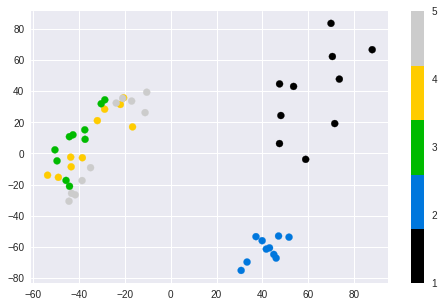

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_sample, cmap = plt.cm.get_cmap('nipy_spectral', num))

cbar = plt.colorbar()
location = np.arange(1, num+1)
cbar.set_ticks(location)

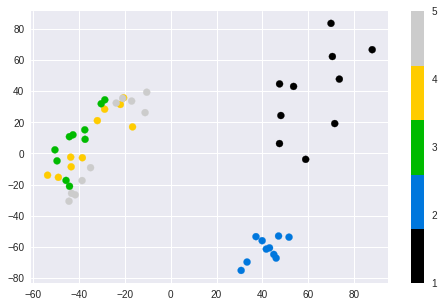

In [0]:
x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3,random_state=42)
x_test2, x_test3, y_test2, y_test3 = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)


In [17]:
clf = LogisticRegression(C=0.001)
clf =clf.fit(x_train,y_train)
pred = clf.predict(x_test2)
from sklearn.metrics import accuracy_score
print("accuracy_score for predicted data")
print("%d percent"%(100*accuracy_score(pred,y_test2)) )
print("predicted classes: ")
print(pred)
print("actual classes: ")
print(y_test2)
scaler = StandardScaler()
scaler = scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_cross_val_scaled = scaler.transform(x_test2)
x_test_scaled=scaler.transform(x_test3)
y_cross_val = y_test2
y_test = y_test3



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score for predicted data
90 percent
predicted classes: 
[25 23 28 15  2 26 25 20 19 12 29 24  1 17 19 36 12  9 39 33  7 27  4 24
 23 38 37  6 30 31  2 26 27 29 25 39 13 35 40 24 18  7 37 20 40  4  8 11
 14  2 22 24 25 34 33  7  3 30  1  7]
actual classes: 
[25 23 14 15  2 26  4 20 19 12 29 24  1 17 14 36 12  9 39 33  7 27  4 24
 23 38 37  6 30 31  2 26 27 29  4 39 13 35 40 24 18  7 37 20 40  4 10 11
 14  2 22 24  4 34 33  7  3 30  1  7]


In [0]:
def n_comp():
  import numpy as np
  from sklearn.decomposition import PCA
  np.random.seed(0)
  print(x_train.shape[1])
  for i in range(x_train.shape[1]):
    my_model = PCA(n_components=i)
    my_model.fit_transform(x_train)
    print(i)
    print (my_model.explained_variance_ratio_)


In [0]:
x_test=x_cross_val_scaled

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, svd_solver='full')
x_train_pca = pca.fit_transform(x_train_scaled)
x_cross_val_pca = pca.transform(x_cross_val_scaled)
x_test_pca = pca.transform(x_test_scaled)
print(x_cross_val_pca.shape)
print(x_test_pca.shape)
print(x_train_pca.shape)
clf =clf.fit(x_train_pca, y_train)


(60, 237)
(60, 237)
(280, 237)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:

from sklearn.metrics import accuracy_score
print("accuracy score for cross validation: ")
print(100*clf.score(x_cross_val_pca, y_test2))
print("accuracy score for test: ")
print(100*clf.score(x_test_pca, y_test))


accuracy score for cross validation: 
81.66666666666667
accuracy score for test: 
88.33333333333333


In [0]:
clf1 = LinearSVC(C=0.001)
clf1 = clf1.fit(x_train_pca, y_train)

In [37]:
print("accuracy score with SVC model: ")
print("For corss_validaton: ")
print(100*clf1.score(x_cross_val_pca, y_test2))
print("For test: ")
print(100*clf1.score(x_test_pca, y_test))

accuracy score with SVC model: 
For corss_validaton: 
83.33333333333334
For test: 
88.33333333333333


In [0]:
def gallery(images, titles, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        fig = plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
        
def titles(y_pred, y_test):
    for i in range(y_pred.shape[0]):
        yield 'predicted: {0}\ntrue: {1}'.format(y_pred[i], y_test[i])

In [0]:
pred = clf.predict(x_test_pca)

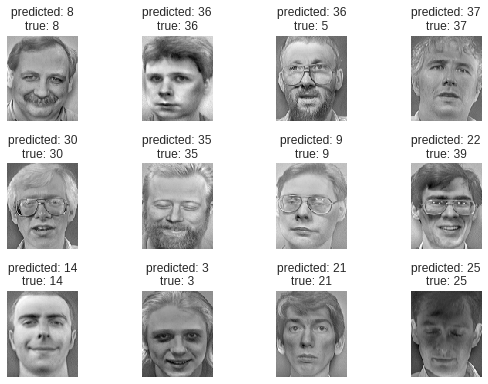

In [43]:
"""
Comparison between predicted and actual classes
"""

prediction_titles = list(titles(pred, y_test))
gallery(x_test.reshape(-1, 112, 92), prediction_titles)

In [0]:
"""
OUR Model correctly predicted 10 out of 12 means it have an accuracy of about 83.33 percent
"""